In [3]:
!git clone https://github.com/sorki/python-mnist
!./python-mnist/bin/mnist_get_data.sh
!pip3 install emnist
from emnist import extract_training_samples

print("Imported the EMNIST libraries we need!")

fatal: destination path 'python-mnist' already exists and is not an empty directory.
./python-mnist/bin/mnist_get_data.sh: line 9: wget: command not found
~/development/data ~/development
gunzip: can't stat: * (*.gz): No such file or directory
~/development
Imported the EMNIST libraries we need!


In [4]:
# Grab the data from the OpenML website
# X will be our images and y will be the labels
X, y = extract_training_samples('letters')

# Make sure that every pixel in all of the images is a value between 0 and 1
X = X / 255.

# Use the first 60000 instances as training and the next 10000 as testing
X_train, X_test = X[:60000], X[60000:70000]
y_train, y_test = y[:60000], y[60000:70000]

# There is one other thing we need to do, we need to
# record the number of samples in each dataset and the number of pixels in each image
X_train = X_train.reshape(60000,784)
X_test = X_test.reshape(10000,784)

print("Extracted our samples and divided our training and testing data sets")

Extracted our samples and divided our training and testing data sets


Image Label: d


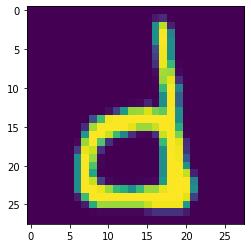

In [11]:
import matplotlib.pyplot as plt

img_index = 59999 # <<<<<  You can update this value to look at other images
img = X_train[img_index]
print("Image Label: " + str(chr(y_train[img_index]+96)))
plt.imshow(img.reshape((28,28)))

In [14]:
# STEP 2.1

# These two lines import the ML libraries we need
from sklearn.datasets import fetch_openml
from sklearn.neural_network import MLPClassifier

# This creates our first MLP with 1 hidden layer with 50 neurons and sets it to run through the data 20 times
mlp1 = MLPClassifier(hidden_layer_sizes=(50,), max_iter=30, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)

print("Created our first MLP network")

Created our first MLP network


In [15]:
mlp1.fit(X_train, y_train)
print("Training set score: %f" % mlp1.score(X_train, y_train))
print("Test set score: %f" % mlp1.score(X_test, y_test))

Iteration 1, loss = 1.06351395
Iteration 2, loss = 0.64844650
Iteration 3, loss = 0.56103245
Iteration 4, loss = 0.51987725
Iteration 5, loss = 0.49182099
Iteration 6, loss = 0.47301057
Iteration 7, loss = 0.45839220
Iteration 8, loss = 0.44603836
Iteration 9, loss = 0.43479721
Iteration 10, loss = 0.42809575
Iteration 11, loss = 0.41639233
Iteration 12, loss = 0.40782908
Iteration 13, loss = 0.40548360
Iteration 14, loss = 0.39965983
Iteration 15, loss = 0.39296832
Iteration 16, loss = 0.38883219
Iteration 17, loss = 0.38393955
Iteration 18, loss = 0.37948343
Iteration 19, loss = 0.37307616
Iteration 20, loss = 0.37166732
Iteration 21, loss = 0.36703635
Iteration 22, loss = 0.36357559
Iteration 23, loss = 0.36073798
Iteration 24, loss = 0.35711691
Iteration 25, loss = 0.35309283
Iteration 26, loss = 0.34784002
Iteration 27, loss = 0.34588190
Iteration 28, loss = 0.34274738
Iteration 29, loss = 0.33743685
Iteration 30, loss = 0.33963232
Training set score: 0.897100
Test set score: 0.84

/Users/natalieleung/opt/anaconda3/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (30) reached and the optimization hasn't converged yet.
  warnings.warn(


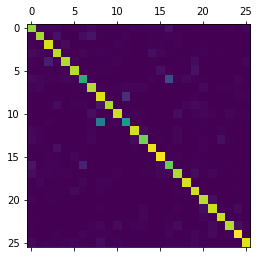

In [16]:
# STEP 3.2

# First let's initialize a list with all the predicted values from the training set
y_pred = mlp1.predict(X_test)

# Now let's visualize the errors between the predictions and the actual labels using a confusion matrix
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred)
plt.matshow(cm)

There were 9 times that the letter n was predicted to be the letter m.


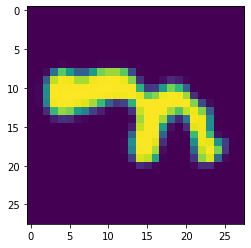

In [18]:
# STEP 3.3

# You can change this to any letters that you think the neural network may have confused...
predicted_letter = 'm'
actual_letter = 'n'


# This code counts all mistakes for the letters above
mistake_list = []
for i in range(len(y_test)):
  if (y_test[i] == (ord(actual_letter) - 96) and y_pred[i] == (ord(predicted_letter) - 96)):
    mistake_list.append(i)
print("There were " + str(len(mistake_list)) + " times that the letter " + actual_letter + " was predicted to be the letter " + predicted_letter + ".")

# Once we know how many mistakes were made, we can change this to see an image of a particular one
mistake_to_show = 4 # <<< e.g., change this to 3 if you want to see the 4th mistake

# This code checks that the number mistake you asked for can be shown and if so, displays an image of it
if (len(mistake_list)> mistake_to_show):
  img = X_test[mistake_list[mistake_to_show]]
  plt.imshow(img.reshape((28,28)))
else:
  print("Couldn't show mistake number " + str(mistake_to_show + 1) + " because there were only " + str(len(mistake_list)) + " mistakes to show!")

In [19]:
# STEP 3.4

# Change some of the values in the below statement and re-run to see how they 
# affect performance!
mlp2 = MLPClassifier(hidden_layer_sizes=(100,100,100,100,100,), max_iter=50, alpha=1e-4,
                    solver='sgd', verbose=10, tol=1e-4, random_state=1,
                    learning_rate_init=.1)
mlp2.fit(X_train, y_train)
print("Training set score: %f" % mlp2.score(X_train, y_train))
print("Test set score: %f" % mlp2.score(X_test, y_test))

Iteration 1, loss = 1.15599672
Iteration 2, loss = 0.54834774
Iteration 3, loss = 0.44784035
Iteration 4, loss = 0.39865207
Iteration 5, loss = 0.36308811
Iteration 6, loss = 0.33567397
Iteration 7, loss = 0.31904877
Iteration 8, loss = 0.29485588
Iteration 9, loss = 0.27846574
Iteration 10, loss = 0.26938228
Iteration 11, loss = 0.25802023
Iteration 12, loss = 0.25788282
Iteration 13, loss = 0.24761577
Iteration 14, loss = 0.23721596
Iteration 15, loss = 0.23420416
Iteration 16, loss = 0.22785533
Iteration 17, loss = 0.21958147
Iteration 18, loss = 0.22056595
Iteration 19, loss = 0.21863622
Iteration 20, loss = 0.20322080
Iteration 21, loss = 0.20956603
Iteration 22, loss = 0.20600221
Iteration 23, loss = 0.19503587
Iteration 24, loss = 0.19667913
Iteration 25, loss = 0.19624233
Iteration 26, loss = 0.20038150
Iteration 27, loss = 0.19274403
Iteration 28, loss = 0.19204916
Iteration 29, loss = 0.19471375
Iteration 30, loss = 0.18812517
Iteration 31, loss = 0.19065674
Iteration 32, los